In [ ]:
N=5

In [ ]:
1. Расчет корреляций и 2. Визуализация

Корреляция Пирсона: 0.19437455140867985 CI: (np.float64(-0.27149917188039824), np.float64(0.5864518109305056))
Корреляция Спирмена: 0.17502306934034584
Корреляция Кенделла: 0.12229018009359618
Корреляция Фехнера: 0.11


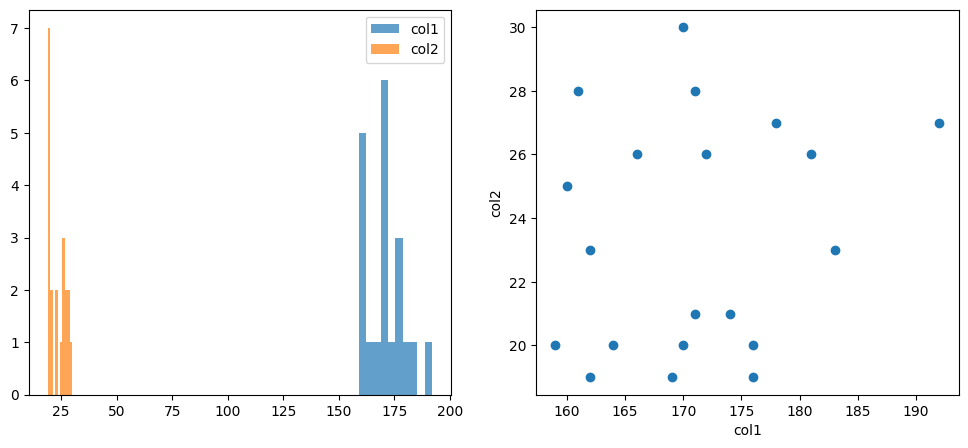

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("students_simple.csv")

N = 5
col1 = df.iloc[:, N % 5]
col2 = df.iloc[:, N**2 % 5 + 5]

pearson_corr, pearson_p = stats.pearsonr(col1, col2)
alpha = 0.05
r = pearson_corr
n = len(col1)
se = 1 / np.sqrt(n - 3)
z = np.arctanh(r)
z_crit = stats.norm.ppf(1 - alpha/2)
ci_low = np.tanh(z - z_crit*se)
ci_high = np.tanh(z + z_crit*se)

spearman_corr, spearman_p = stats.spearmanr(col1, col2)
kendall_corr, kendall_p = stats.kendalltau(col1, col2)

def fechner_corr(x, y):
    signs = np.sign(x[:, None] - x) * np.sign(y[:, None] - y)
    return np.sum(signs) / (len(x)**2)

fechner = fechner_corr(col1.values, col2.values)

print("Корреляция Пирсона:", pearson_corr, "CI:", (ci_low, ci_high))
print("Корреляция Спирмена:", spearman_corr)
print("Корреляция Кенделла:", kendall_corr)
print("Корреляция Фехнера:", fechner)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(col1, alpha=0.7, label='col1')
plt.hist(col2, alpha=0.7, label='col2')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(col1, col2)
plt.xlabel('col1')
plt.ylabel('col2')
plt.show()


In [5]:
Между этими двумя столбцами есть слабая положительная связь. Пирсон около 0.19, но доверительный интервал показывает, что она может быть не очень
надёжной. Спирмен 0.18, Кенделл 0.12, Фехнер 0.11 — всё маленькие, так что ранг и знаковая связь почти не выражены.
В целом, сильной корреляции между столбцами нет.

SyntaxError: invalid character '—' (U+2014) (1455781992.py, line 1)

In [ ]:
3. Уравнение регрессии

Линейная: y = 0.526421819779558 *x + 0.3115668327445834
Квадратичная: y = 6.566804793538914 *x^2 + -11.337373195942433 *x + 5.656276358842267
Гиперболическая: y = -0.4082831971192702 /x + 1.2399005145895046
Показательная: y = 0.4233965618812957 *exp( 0.6861016518013385 *x)


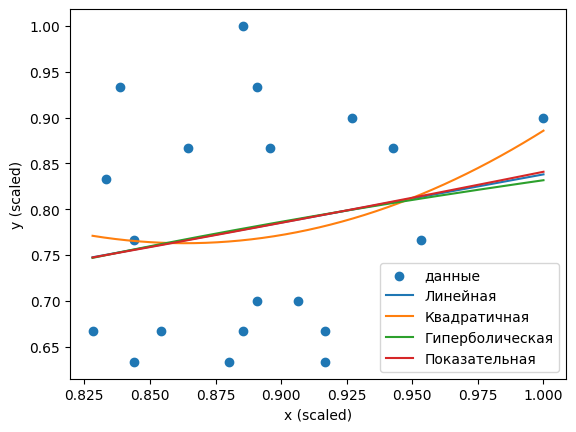

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv("students_simple.csv")
N = 5
x = df.iloc[:, N % 5].values
y = df.iloc[:, N**2 % 5 + 5].values

x_scaled = x / np.max(x)
y_scaled = y / np.max(y)

def linear(x, w1, w0):
    return w1*x + w0
p_lin, _ = curve_fit(linear, x_scaled, y_scaled)

def quadratic(x, w2, w1, w0):
    return w2*x**2 + w1*x + w0
p_quad, _ = curve_fit(quadratic, x_scaled, y_scaled)

mask = x_scaled != 0
def hyperbolic(x, w1, w0):
    return w1/x + w0
p_hyp, _ = curve_fit(hyperbolic, x_scaled[mask], y_scaled[mask])

y_exp = y_scaled.copy()
y_exp[y_exp <= 0] = 1e-6
def exponential(x, w1, w0):
    return w0 * np.exp(w1*x)
p_exp, _ = curve_fit(exponential, x_scaled, y_exp, maxfev=10000)

print("Линейная: y =", p_lin[0], "*x +", p_lin[1])
print("Квадратичная: y =", p_quad[0], "*x^2 +", p_quad[1], "*x +", p_quad[2])
print("Гиперболическая: y =", p_hyp[0], "/x +", p_hyp[1])
print("Показательная: y =", p_exp[1], "*exp(", p_exp[0], "*x)")

x_fit = np.linspace(min(x_scaled), max(x_scaled), 200)
plt.scatter(x_scaled, y_scaled, label='данные')
plt.plot(x_fit, linear(x_fit, *p_lin), label='Линейная')
plt.plot(x_fit, quadratic(x_fit, *p_quad), label='Квадратичная')
plt.plot(x_fit, hyperbolic(x_fit, *p_hyp), label='Гиперболическая')
plt.plot(x_fit, exponential(x_fit, *p_exp), label='Показательная')
plt.legend()
plt.xlabel('x (scaled)')
plt.ylabel('y (scaled)')
plt.show()


In [8]:
После построения регрессий видно, что линейная модель показывает умеренный рост зависимости, квадратичная слегка изогнута, гиперболическая 
убывает при малых значениях x, а показательная постепенно возрастает. В целом, данные можно описать разными типами регрессий, 
однако выраженной сильной зависимости между переменными не наблюдается.

SyntaxError: invalid character '—' (U+2014) (1443067034.py, line 4)

In [ ]:
4. Проверка уравнения регрессии

In [19]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats

df = pd.read_csv("students_simple.csv")
N = 5
x = df.iloc[:, N % 5].values
y = df.iloc[:, N**2 % 5 + 5].values

x_scaled = x / np.max(x)
y_scaled = y / np.max(y)

def linear(x, w1, w0):
    return w1*x + w0
p_lin, _ = curve_fit(linear, x_scaled, y_scaled)

def quadratic(x, w2, w1, w0):
    return w2*x**2 + w1*x + w0
p_quad, _ = curve_fit(quadratic, x_scaled, y_scaled)

mask = x_scaled != 0
def hyperbolic(x, w1, w0):
    return w1/x + w0
p_hyp, _ = curve_fit(hyperbolic, x_scaled[mask], y_scaled[mask])

y_exp = y_scaled.copy()
y_exp[y_exp <= 0] = 1e-6
def exponential(x, w1, w0):
    return w0 * np.exp(w1*x)
p_exp, _ = curve_fit(exponential, x_scaled, y_exp, maxfev=10000)

models = {
    "Линейная": (linear, p_lin),
    "Квадратичная": (quadratic, p_quad),
    "Гиперболическая": (hyperbolic, p_hyp),
    "Показательная": (exponential, p_exp)
}

def fisher_test(model_func, params, x, y):
    y_pred = model_func(x, *params)
    ssr = np.sum((y_pred - np.mean(y))**2)
    sse = np.sum((y - y_pred)**2)
    df_model = len(params)
    df_resid = len(y) - df_model
    F = (ssr/df_model) / (sse/df_resid)
    p_value = 1 - stats.f.cdf(F, df_model, df_resid)
    return F, p_value

results = {}
for name, (func, params) in models.items():
    F, p = fisher_test(func, params, x_scaled, y_scaled)
    results[name] = (F, p)

best_model = max(results.items(), key=lambda x: x[1][0])
worst_model = min(results.items(), key=lambda x: x[1][0])

print("Результаты критерия Фишера:")
for name, (F, p) in results.items():
    print(f"{name}: F = {F:.3f}, p = {p:.3f}")

print("\nНаилучшая модель по F:", best_model[0])
print("Наихудшая модель по F:", worst_model[0])


Результаты критерия Фишера:
Линейная: F = 0.353, p = 0.707
Квадратичная: F = 0.336, p = 0.800
Гиперболическая: F = 0.323, p = 0.728
Показательная: F = 0.373, p = 0.694

Наилучшая модель по F: Показательная
Наихудшая модель по F: Гиперболическая


In [ ]:
По результатам критерия Фишера видно, что ни одна из моделей не показывает сильного соответствия данным — все F маленькие, а p-value высокие.
Среди рассмотренных вариантов показательная модель оказалась наилучшей, а гиперболическая — наихудшей, но разница между ними невелика, 
так что все модели описывают данные примерно одинаково.